# Logistic Regression
-------

In the last chapter, we covered linear regression. We saw that linear regression was synonymous to best fit lines, which are taught in high school. We also saw that it was well-suited for continuous data (i.e., values which can be any value between negative infinity and infinity, even decimal numbers), which follow a straight line.

In this chapter, we'll cover logistic regression. Unlike linear regression, logistic regression isn't well-suited for continuous values. Rather, its purpose is for categorical data. In this chapter, we'll be focusing on binary data. Binary means that the data can only have 2 values (e.g., 0 and 1 or a and b).

Instead of reading about it, let's see it in action. Let's import the same libraries that we did in the last chapter. These libraries have the same purpose as they did in chapter 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

We're making some mock data again in this chapter. This time we’ll make 30 points. 15 of them have the y value of 1 and 15 of them have the y value of 0.

In [2]:
X = np.concatenate((np.arange(15, dtype=float), np.arange(20, 35, dtype=float)), axis=0)
y = np.concatenate((np.zeros(15, dtype=float), np.ones(15, dtype=float)), axis=0)

Let's plot them and see how they look.

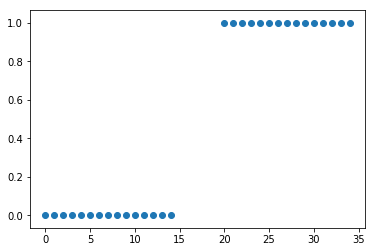

In [3]:
plt.scatter(X, y)

Just like the last chapter, we started by making mock data. Our dataset currently consists of 30 data points. The main difference between this dataset and last chapter’s dataset is that, unlike last chapter, this dataset only contains binary data (i.e., only 2 y-values: 0 and 1). Now, before we continue, the question I want to answer is, why can't we just fit our linear regression to binary data? Let's try fitting it and see what happens!

The code below was copied over from chapter 1.

## 1.1. Applying Linear Regression to Binary Data

In [4]:
def mse(y, y_pred): ##mean squared error
    return np.sum((y - y_pred)**2)/y.shape[0]

<Figure size 432x288 with 0 Axes>

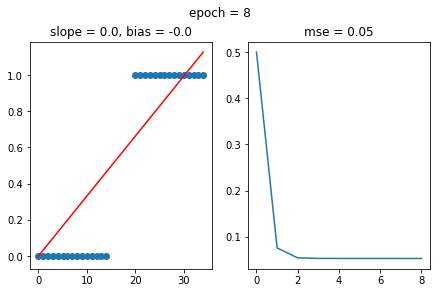

In [7]:
epoch_loss = []

slope = 0.
bias = 0.
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(10): 
    y_pred = slope*X + bias
    loss = mse(y, y_pred)
    epoch_loss.append(loss)

    if(epoch%2==0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred, 'r')
        ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
        ax1.set_title('mse = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################

    ###slope and bias derivatives with respect to mse###
    D_mse_wrt_slope = np.sum(X * (y - y_pred)) 
    D_mse_wrt_bias = np.sum(y - y_pred) 


    slope += learning_rate * D_mse_wrt_slope
    bias += learning_rate * D_mse_wrt_bias

In all honesty, the results given by linear regression, in this case, aren't bad. I mean, clearly, a straight line isn't the right shape to fit the data, but if we keep a threshold/cut-off at 0.6, then it could work. In the sense that, anything greater than or equal to 0.6 gets rounded to 1 and anything less than 0.6 gets rounded to 0. In that case, it would give us perfect results. Our MSE also seems not to be the right loss function, but it works for this case.

Now, the question is, if linear regression is so good, why don't we just accommodate it, with a threshold, so that it works for our binary data? Continue below to see why that may not be a good idea.

## 1.2 The Problem with Linear Regression

Before we can see the problem with linear regression on binary data, I'm going to add 1 extra point for our dataset. This point has the y value of 1, but the x value is a lot farther than the rest of the points. Let's take a look.

In [8]:
X = np.concatenate((X, np.array([60])))
y = np.concatenate((y, np.array([1])))

Let's plot them and see how they look.

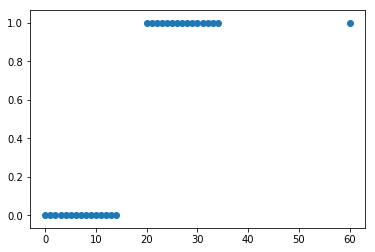

In [9]:
plt.scatter(X, y)

If you look at the graph above, you'll see that the data is more or less the same, except that there's 1 point which is very far from the rest of the points. Let's see how this effects linear regression.

<Figure size 432x288 with 0 Axes>

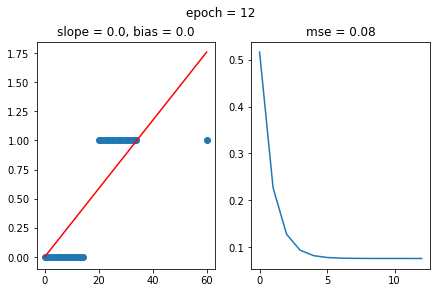

In [10]:
epoch_loss = []

slope = 0.
bias = 0.
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(14):
    y_pred = slope*X + bias
    loss = mse(y, y_pred)
    epoch_loss.append(loss)

    if(epoch%2==0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred, 'r')
        ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
        ax1.set_title('mse = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################


    ###slope and bias derivatives with respect to mse###
    D_mse_wrt_slope = np.sum(X * (y - y_pred))
    D_mse_wrt_bias = np.sum(y - y_pred)

    slope += learning_rate * D_mse_wrt_slope
    bias += learning_rate * D_mse_wrt_bias

The way 1 point on the graph had so much effect on the line is very interesting. All of a sudden, the line completely changed its slope. You could change the threshold to 0.5, but you can see that plotting a linear regression line isn't the sturdiest solution to our binary data problem.

## 1.3 The Sigmoid Function

Now that we established that linear regression isn't really what we're looking for, you're probably thinking "what if we could just fit an 'S' shape?" The good news is, we actually can just plot an S-shape line. The line you're thinking about is known as a sigmoid function. It's also known as the logistic function, hence the name logistic regression.

Let's take a look at it...

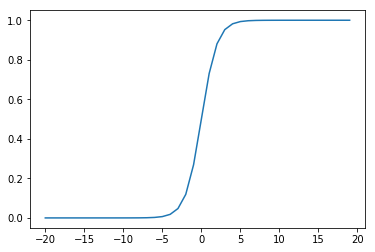

In [11]:
temp_X = np.arange(-20, 20, dtype=float)
slope, bias = 1, 0
linear_eqn = slope*temp_X+bias
sigmoid_eqn = 1/(1+np.exp(-linear_eqn))
plt.plot(temp_X, sigmoid_eqn)
plt.show()

This is exactly what we're looking for! With the sigmoid function, we can always conclude that values greater than or equal to 0.5 are 1 and values less than 0.5 are 0.

What's more interesting is that if you look at lines 3 and 4 of the code cell (i.e., the equations which make up the sigmoid function), you'll see that it's using the equation of a line from linear regression, but just adding a little bit to it. Let's dissect the code a bit.

The first line of the code is nothing we haven't seen before – it's just me making dummy x values. These values are from -10 to 10. The second line is where things get interesting – I'm defining a slope and a bias. The third line, I have an equation which looks exactly like my linear regression equation. That's because it is the exact same equation. The last line, before I plot the graph, is where the magic happens. I'm taking the linear regression equation and using it in my sigmoid equation. That's powerful. The 1 in the numerator and the 1 in the denominator are constants (i.e., values that don't change). This means that, just like the linear regression equation, all the influence for the sigmoid function lies in the slope and the bias values.

Before you continue, go back to the code cell above and change the slope and the bias values to see how they affect the sigmoid function. Try values 5 and 0.5 for the slope and 3 and -3 for the bias. Something you'll notice is that the top of the S always tapers off at 1 and the bottom of it always tapers off at 0. This tapering off is also known as an asymptote. There are asymptotes at 1 and 0. This essentially means that the line will never touch 1 nor 0. It gets infinitely close, but never touches. You can see why it's the perfect equation to fit binary data.

## 1.4 Logistic Regression's Loss Function

Now, how do we automate this? Maybe we should recap the steps for the automation of linear regression, in case you forgot.

For each epoch, we would:
1. Calculate the linear regression equation, using the x values to get predicted y values
2. Take the predicted y values and compare them with the actual y values, using the loss function MSE
3. Calculate the derivatives of the slope and bias, with respect to the MSE
4. Update the slope and the bias values in order to reach the lowest MSE values

We can condense the wording for those steps as:
1. Forward propagation
2. Calculate loss
3. Backpropagation
4. Update weights

Looking at those steps, we figured out the forward propagation for logistic regression. Let's calculate the loss. We could use MSE, like we did in linear regression, but that calculates the residuals (i.e., the distance between our best fit line and the actual points). That won't make sense for logistic regression's case. For logistic regression, we don't care how far the point is from the line, because it can't really be that far (considering every point is either a 0 or a 1). What we do care about is how many points on the graph are correctly classified.

I'm going to give you the loss function, which is also known as log loss or binary cross entropy (BCE), and then we'll step through the equation.

In [12]:
def BCE(y, y_pred): ##log loss error (binary cross entropy)
    return -np.sum((y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))/y.shape[0]

Now that we've seen the equation, let's clean it up a bit, so that it's easier to read. 

[-y * np.log(y_pred)] - [(1-y) * np.log(1-y_pred))]

You can see that I got rid of the denominator and the summation. We can return back to those in a bit. Before that though, let's look at the equation without those. You'll see that the equation now has two parts to it.<br/>
Part 1 of the equation is:<br/>
[-y * np.log(y_pred)]<br/>
And part 2 of the equation is:<br/>
[(1-y) * np.log(1-y_pred))]<br/>
Let's try putting in some values for y and y_pred and see what the equation returns.

Before we begin, remember, y_pred is the value which is outputted by our sigmoid function. It can be any decimal number between 0 and 1, but it well never exactly be 0 or 1.

Let's start with if y is 0 (which means that we should be predicting 0), we'll get the following:<br/>
[-0 * np.log(y_pred)] - [(1-0) * np.log(1-y_pred))]<br/>
which simplifies to:<br/>
-np.log(1-y_pred)

Now, if we set y to 1 (which means that we should be predicting 1), we'll get the following:<br/>
[-1 * np.log(y_pred)] - [(1-1) * np.log(1-y_pred))]<br/>
which simplifies to:<br/>
-np.log(y_pred)

That's interesting. You can see that at any given time, only 1 part of the equation will actually be worth something greater than 0. 

Why is there conveniently always a negative in front? Remember, our values are going to be decimal values between 0 and 1. The log of those values will always give you a negative number. To turn those negatives into positives, we put another negative in front.

That's cool, but why the log? It's because the log (when you place a negative in front) will penalize larger values by making them worth less and it will reward very low values, by making them worth more. Remember, the value inside the log function should be as close to 0 as possible. The closer it is to 0, the better. The cells below should explain what I mean by rewarding low values and penalizing high values...

In [13]:
-np.log(0.0001)

9.210340371976182

In [14]:
-np.log(0.1)

2.3025850929940455

In [15]:
-np.log(0.9)

0.10536051565782628

If you're still having some difficulty with the penalizing and rewarding done by the log function (when a negative is placed out front), maybe try more values between 0 and 1.

Awesome! Now that we understand why the log is there and how it effects our values; we have 2 things outstanding, the summation and the denominator – both of which can be explained together.

What our loss function (BCE) does is, it returns the average loss across all the points in our dataset. How do you calculate an average? By summing up all the values across all the points in the dataset and dividing by the number of points there are. Our np.sum sums all the values and y.shape[0] gives us the number of points in our dataset. Put them together and you get your average.

Finally, we've gone through the explanation of binary cross entropy. Hope that made sense.

## 1.5 Logistic Regression's Backpropogation

Now that we've gone over steps 1 and 2 of our algorithm to implement logistic regression with gradient descent, we're back at the calculus part. Just like last chapter, I won’t be going over the derivatives, but just provide you with the equations.

The derivative of the BCE with respect to the slope is -[(-y/y_pred) + ((1-y)/(1-y_pred))]*[y_pred*(1-y_pred)]* X.<br>
The derivative of the BCE with respect to the bias is -[(-y/y_pred) + ((1-y)/(1-y_pred))]*[y_pred*(1-y_pred)].

## 1.6 Putting It All Together

Now that we've figured out all of our steps, let's put it all together.

Run the code below and check out how far we've gotten!

<Figure size 432x288 with 0 Axes>

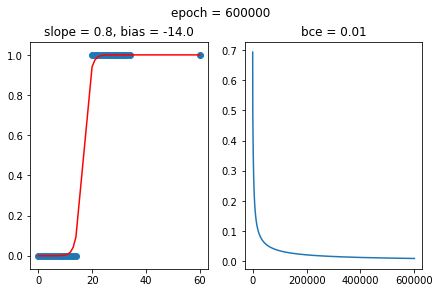

In [16]:
epoch_loss = []

slope = 0.
bias = 0.
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(600000+1):
    linear = slope*X + bias
    y_pred = 1/(1+np.exp(-linear)) ##logistic function
    loss = BCE(y, y_pred)
    epoch_loss.append(loss)


    if(epoch%50000 == 0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred, 'r')
        ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
        ax1.set_title('bce = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################
    
    ###slope and bias derivatives with respect to loss###
    dLoss_dLogistic = (-y/y_pred) + ((1-y)/(1-y_pred))
    dLogistic_dLinear = y_pred*(1-y_pred)
    dLinear_dSlope = X
    ##computational graph
    dLoss_dSlope = -np.sum(dLoss_dLogistic * dLogistic_dLinear * dLinear_dSlope) 
    dLoss_dBias = -np.sum(dLoss_dLogistic * dLogistic_dLinear)

    slope += learning_rate * dLoss_dSlope
    bias += learning_rate * dLoss_dBias

There we have it. Logistic regression with gradient descent, in action!

Before we wrap up this section, I'm going to go over a neat trick. The awesome part about logistic regression is that, if you simplify the calculus (something we won't be doing in this book), you'll see that you can use the exact same calculus and weight update equations which were used for linear regression.

Take a look at the cell below. You'll see that we really simplified our backpropagation step. Truthfully, the code for backpropagation and updating the weights were just copied and pasted from chapter 1. Minus the sigmoid function, that makes our code for logistic regression essentially identical to our code for linear regression. Go back to the last code cell of chapter 1 and see for yourself.

<Figure size 432x288 with 0 Axes>

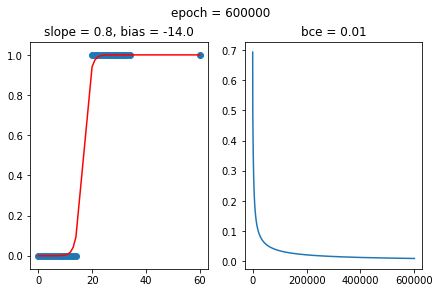

In [17]:
epoch_loss = []

slope = 0.
bias = 0.
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(600000+1):
    linear = slope*X + bias
    y_pred = 1/(1+np.exp(-linear)) ##logistic function
    loss = BCE(y, y_pred)
    epoch_loss.append(loss)


    if(epoch%50000 == 0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred, 'r')
        ax0.set_title('slope = {0:.1f}, bias = {1:.1f}'.format(slope, bias))
        ax1.set_title('bce = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################
    
    ###simplified slope and bias derivatives with respect to loss###  
    D_bce_wrt_slope = np.sum(X * (y - y_pred))
    D_bce_wrt_bias = np.sum(y - y_pred)
    ###########

    slope += learning_rate * D_bce_wrt_slope
    bias += learning_rate * D_bce_wrt_bias

## 1.7 Logistic Regression's Computation Graph

Before we finish off this chapter, let's end with logistic regression's computation graph. It's a nice and simple diagram which sums up the steps to logistic regression using gradient descent. Just like last time, our process starts at the left and goes to the right and then returns in reverse, using the derivatives, to complete backpropagation.

![logistic%20regression.png](images/logistic%20regression.png?raw=true)